<a href="https://colab.research.google.com/github/Guhan2348519/QC_LAB/blob/main/2348519_QC_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Design quantum circuit for the operations HSHT and check the output for the two basic input qubits.
2. Check the reversibility of the operation HSHT and comments on that.
3. Design a quantum circuit using H and Control- Not gate and check the output for various input combinations.
4. Comments on the output generated by the above circuit and establish the relation with Bell states

In [3]:
! pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.3 MB/s eta 0:00:00


In [5]:
! pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=368dad2808fdf3d25d6453e9e6e6c5bea5af94e988371ec472335dc368a18ac2
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [7]:
import numpy as np

In [8]:
# Define the Hadamard (H) gate
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])
#define the phase gate
S=np.array([[1,0],[0,1j]])
#define a T gate for phase shift
T=np.array([[1,0],[0,(1+1j)/np.sqrt(2)]])


In [9]:
#Define the quantum gates
ket_0 = np.array([[1], [0]])  # |0⟩
ket_1 = np.array([[0], [1]])  # |1⟩

In [10]:
#perform HSHT
hsht=H @ S @ H @T
print(hsht)

[[0.5       +0.5j        0.70710678+0.j        ]
 [0.5       -0.5j        0.        +0.70710678j]]


In [14]:
! pip install pylatexenc
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)
circuit_drawer(circuit,output="mpl")

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

In [ ]:
#apply HSHT on ket_0 and ket_1
hsht_ket_0 = hsht@ket_0
hsht_ket_1 = hsht@ket_1
# Output results
print("HSHT applied to |0⟩:",hsht_ket_0)
print("HSHT applied to |1⟩:",hsht_ket_1)

HSHT applied to |0⟩: [[0.5+0.5j]
 [0.5-0.5j]]
HSHT applied to |1⟩: [[0.70710678+0.j        ]
 [0.        +0.70710678j]]


In [ ]:
#checking the reversibility operation on HSHT

# Check reversibility by applying the inverse of HSHT
HSHT_inverse = np.conjugate(hsht.T)

rev0=HSHT_inverse @ hsht_ket_0
rev1=HSHT_inverse @ hsht_ket_1

In [ ]:
print("Reversed HSHT on |0⟩:", rev0)
print("Reversed HSHT on |1⟩:", rev1)

Reversed HSHT on |0⟩: [[1.+0.j]
 [0.+0.j]]
Reversed HSHT on |1⟩: [[0.+0.j]
 [1.+0.j]]


Reversability of a matrix operations produces the original input of the input state of the circuit ,which is a fact that quantum gates are unitary and the inverse is equivalent to Hermitian conjugate

A hermitian matrix is a square matrix that is equal to the transpose of its conjugate matrix.


# Computing the BELL states


In [ ]:
#Design a quantum circuit using H and Control- Not gate and check the output for various input combinations.
#define the CNOT gate

CNOT=np.array([[1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 0, 1],
                [0, 0, 1, 0]])

#input states
q00 = np.array([1, 0, 0, 0])
q01 = np.array([0, 1, 0, 0])  # |01⟩
q10 = np.array([0, 0, 1, 0])  # |10⟩
q11 = np.array([0, 0, 0, 1])  # |11⟩

In [ ]:
H_I=np.kron(H,np.eye(2))
print(np.eye(2))
print('\n')
print(f"tensor product of h,I is :")
print(H_I)

[[1. 0.]
 [0. 1.]]


tensor product of h,I is :
[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.         -0.70710678 -0.        ]
 [ 0.          0.70710678 -0.         -0.70710678]]


In [ ]:
#apply hadamard on CNOT
h_q00=H_I @ q00
h_q01=H_I @ q01
h_q10=H_I @ q10
h_q11= H_I @ q11

print(f"hadamard on q00:")
print(h_q00)

print('\n')

print(f"hadamard on q01:")
print(h_q01)

print('\n')

print(f"hadamard on q10:")
print(h_q10)

print('\n')

print(f"hadamard on q11:")
print(h_q11)

hadamard on q00:
[0.70710678 0.         0.70710678 0.        ]


hadamard on q01:
[0.         0.70710678 0.         0.70710678]


hadamard on q10:
[ 0.70710678  0.         -0.70710678  0.        ]


hadamard on q11:
[ 0.          0.70710678  0.         -0.70710678]


In [ ]:
#Apply CNOT to the result
CNOT_H_q00 = CNOT @ h_q00
print("input result of 00")
print(CNOT_H_q00)

print('\n')


CNOT_H_q01=CNOT @ h_q01
print("input result of 01")
print(CNOT_H_q01)

print('\n')

CNOT_H_q10= CNOT @ h_q10
print("input result of 10")
print(CNOT_H_q10)

print('\n')


CNOT_H_q11=CNOT @ h_q11
print("input result of 11")
print(CNOT_H_q11)

input result of 00
[0.70710678 0.         0.         0.70710678]


input result of 01
[0.         0.70710678 0.70710678 0.        ]


input result of 10
[ 0.70710678  0.          0.         -0.70710678]


input result of 11
[ 0.          0.70710678 -0.70710678  0.        ]


The circuit designed consists of:
1. **Hadamard Gate (H)** applied to the first qubit, creating a superposition.
2. **CNOT Gate**, with the first qubit as the control and the second qubit as the target. This creates entanglement between the qubits.

Let's go through the states step by step.

#### 1. **Initial State |00⟩:**

- Input state: $ |00⟩ $
- After applying Hadamard to the first qubit $q_0$:
  $
  H |0⟩ = \frac{|0⟩ + |1⟩}{\sqrt{2}} = \frac{1}{\sqrt{2}} (|0⟩ + |1⟩)
  $
  Now the state is:
  $
  \frac{1}{\sqrt{2}} (|00⟩ + |10⟩)
  $
- After applying CNOT (which flips $ q_1 $ when $ q_0 = 1 $):
  $
  \frac{1}{\sqrt{2}} (|00⟩ + |11⟩)
  $

This is one of the **Bell states**, specifically $ |\Phi^+⟩ $, defined as:
$
|\Phi^+⟩ = \frac{1}{\sqrt{2}} (|00⟩ + |11⟩)
$

#### 2. **Initial State |01⟩:**

- Input state: $ |01⟩ $
- After applying Hadamard to the first qubit $q_0$:
  $
  H |0⟩ = \frac{|0⟩ + |1⟩}{\sqrt{2}} = \frac{1}{\sqrt{2}} (|0⟩ + |1⟩)
  $
  Now the state is:
  $
  \frac{1}{\sqrt{2}} (|01⟩ + |11⟩)
  $
- After applying CNOT:
  $
  \frac{1}{\sqrt{2}} (|01⟩ + |10⟩)
  $

This is another **Bell state**, $ |\Psi^+⟩ $, defined as:
$
|\Psi^+⟩ = \frac{1}{\sqrt{2}} (|01⟩ + |10⟩)
$

#### 3. **Initial State |10⟩:**

- Input state: $ |10⟩ $
- After applying Hadamard to the first qubit $q_0$:
  $
  H |1⟩ = \frac{|0⟩ - |1⟩}{\sqrt{2}} = \frac{1}{\sqrt{2}} (|0⟩ - |1⟩)
  $
  Now the state is:
  $
  \frac{1}{\sqrt{2}} (|00⟩ - |10⟩)
  $
- After applying CNOT:
  $
  \frac{1}{\sqrt{2}} (|00⟩ - |11⟩)
  $

This is the **Bell state** $ |\Phi^-⟩ $, defined as:
$
|\Phi^-⟩ = \frac{1}{\sqrt{2}} (|00⟩ - |11⟩)
$

#### 4. **Initial State |11⟩:**

- Input state: $ |11⟩ $
- After applying Hadamard to the first qubit $q_0$:
  $
  H |1⟩ = \frac{|0⟩ - |1⟩}{\sqrt{2}} = \frac{1}{\sqrt{2}} (|0⟩ - |1⟩)
  $
  Now the state is:
  $
  \frac{1}{\sqrt{2}} (|01⟩ - |11⟩)
  $
- After applying CNOT:
  $
  \frac{1}{\sqrt{2}} (|01⟩ - |10⟩)
  $

This is the **Bell state** $ |\Psi^-⟩ $, defined as:
$
|\Psi^-⟩ = \frac{1}{\sqrt{2}} (|01⟩ - |10⟩)
$

---

### Bell States Overview

Bell states are four specific maximally entangled two-qubit states, given by:

1. $ |\Phi^+⟩ = \frac{1}{\sqrt{2}} (|00⟩ + |11⟩) $
2. $ |\Psi^+⟩ = \frac{1}{\sqrt{2}} (|01⟩ + |10⟩) $
3. $ |\Phi^-⟩ = \frac{1}{\sqrt{2}} (|00⟩ - |11⟩) $
4. $ |\Psi^-⟩ = \frac{1}{\sqrt{2}} (|01⟩ - |10⟩) $

These states are maximally entangled, meaning that measuring one qubit instantaneously determines the state of the other qubit, no matter how far apart they are.

### Relation Between the Circuit and Bell States

- The circuit designed (Hadamard followed by CNOT) prepares **Bell states** depending on the initial state.
- If we input $ |00⟩ $, we get the Bell state $ |\Phi^+⟩ $.
- If we input $ |01⟩ $, we get the Bell state $ |\Psi^+⟩ $.
- If we input $ |10⟩ $, we get the Bell state $ |\Phi^-⟩ $.
- If we input $ |11⟩ $, we get the Bell state $ |\Psi^-⟩ $.

### What are Bell states?

- Bell states are a specific set of maximally entangled quantum states of two qubits. They are in a superposition of 0 and 1 – a linear combination of the two states.

### Conclusion

The circuit consisting of a Hadamard gate and a CNOT gate is a standard quantum circuit to create **Bell states**, which are the simplest form of entangled states. Depending on the initial input, the circuit prepares different Bell states. This shows how entanglement can be generated in quantum systems.

In [ ]:
# using qiskit
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

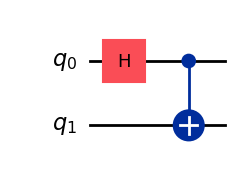

In [ ]:
circuit = QuantumCircuit(2)

circuit.h(0)

# Apply CNOT gate (control on qubit 0, target on qubit 1)
circuit.cx(0, 1)

display(circuit.draw('mpl'))

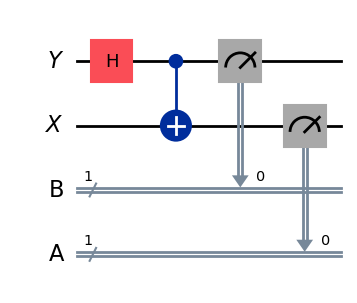

In [ ]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw('mpl'))

C:\Users\saida\AppData\Local\Temp\ipykernel_12068\2370480051.py:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results=Sampler().run(circuit).result()


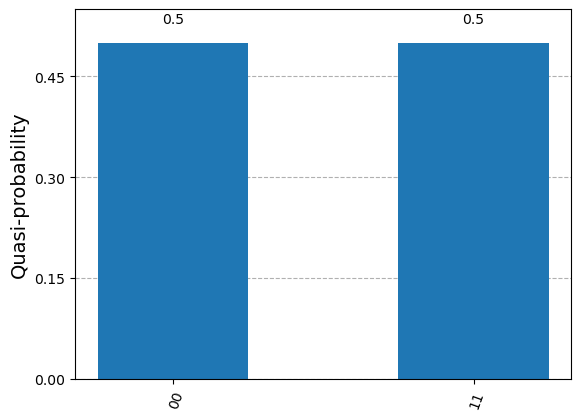

In [ ]:
from qiskit.primitives import Sampler
#simulate the Quantum circuit
results=Sampler().run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))